In [1]:
from __future__ import print_function, division
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import h5py
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

In [2]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20230412-S130000-E132959.0780.V06C.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_1300 = dset[0,:,:]
    print(cal_precip_1300,cal_precip_1300.shape)
    latitude_1300 = f[LATITUDE]
    lat_1300 = latitude_1300[:]
    print(lat_1300,lat_1300.shape)
    longitude_1300 = f[LONGITUDE]
    lon_1300 = longitude_1300[:]
    print(lon_1300,lon_1300.shape)

lat_imerg_1300,lon_imerg_1300 = np.meshgrid(lat_1300,lon_1300)
print(lat_imerg_1300,lat_imerg_1300.shape)
print(lon_imerg_1300,lon_imerg_1300.shape)
cal_precip_1300_max = np.amax(cal_precip_1300)
cal_precip_1300_min = np.amin(cal_precip_1300)
print("precip max =", cal_precip_1300_max)
print("precip min =", cal_precip_1300_min)
del_precip_1300 = np.gradient(cal_precip_1300)
del_precip_1300_x = del_precip_1300[0]
del_precip_1300_y = del_precip_1300[1]
print("Precip Gradient X = ", del_precip_1300_x)
print("Precip Gradient Y = ", del_precip_1300_y)
mag_1300 = np.sqrt(del_precip_1300[0]**2 + del_precip_1300[1]**2)
print("Precip Gradient = ", mag_1300)
cal_precip_1300[cal_precip_1300>3] = 2.7
mag_1300[mag_1300>6] = 2.5

# Open file.
FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20230412-S133000-E135959.0810.V06C.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_1330 = dset[0,:,:]
    print(cal_precip_1330,cal_precip_1330.shape)
    latitude_1330 = f[LATITUDE]
    lat_1330 = latitude_1330[:]
    print(lat_1330,lat_1330.shape)
    longitude_1330 = f[LONGITUDE]
    lon_1330 = longitude_1330[:]
    print(lon_1330,lon_1330.shape)

lat_imerg_1330,lon_imerg_1330 = np.meshgrid(lat_1330,lon_1330)
print(lat_imerg_1330,lat_imerg_1330.shape)
print(lon_imerg_1330,lon_imerg_1330.shape)
cal_precip_1330_max = np.amax(cal_precip_1330)
cal_precip_1330_min = np.amin(cal_precip_1330)
print("precip max =", cal_precip_1330_max)
print("precip min =", cal_precip_1330_min)
del_precip_1330 = np.gradient(cal_precip_1330)
del_precip_1330_x = del_precip_1330[0]
del_precip_1330_y = del_precip_1330[1]
print("Precip Gradient X = ", del_precip_1330_x)
print("Precip Gradient Y = ", del_precip_1330_y)
mag_1330 = np.sqrt(del_precip_1330[0]**2 + del_precip_1330[1]**2)
print("Precip Gradient = ", mag_1330)
cal_precip_1330[cal_precip_1330>3] = 2.7 
mag_1330[mag_1330>6] = 2.5

<KeysViewHDF5 ['Grid']>
[[-9999.9 -9999.9 -9999.9 ...     0.      0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 ...
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]] (3600, 1800)
[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95] (1800,)
[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95] (3600,)
[[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 ...
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]] (3600, 1800)
[[-179.95 -179.95 -179.95 ... -179.95 -179.95 -179.95]
 [-179.85 -179.85 -179.85 ... -179.85 -179.85 -179.85]
 [-179.75 -179.75 -179.75 ... -179.75 -179.75 -179.75]
 ...
 [ 179.75  179.75  179.75 

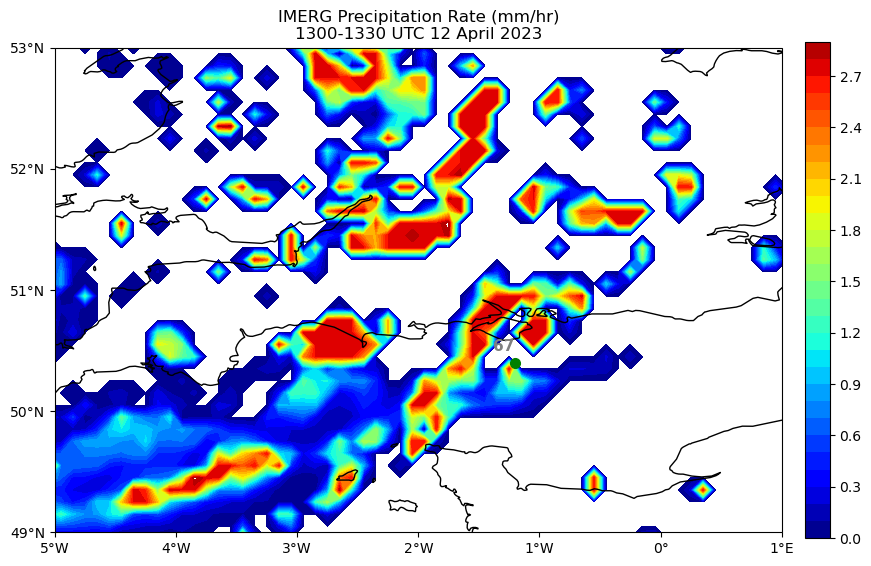

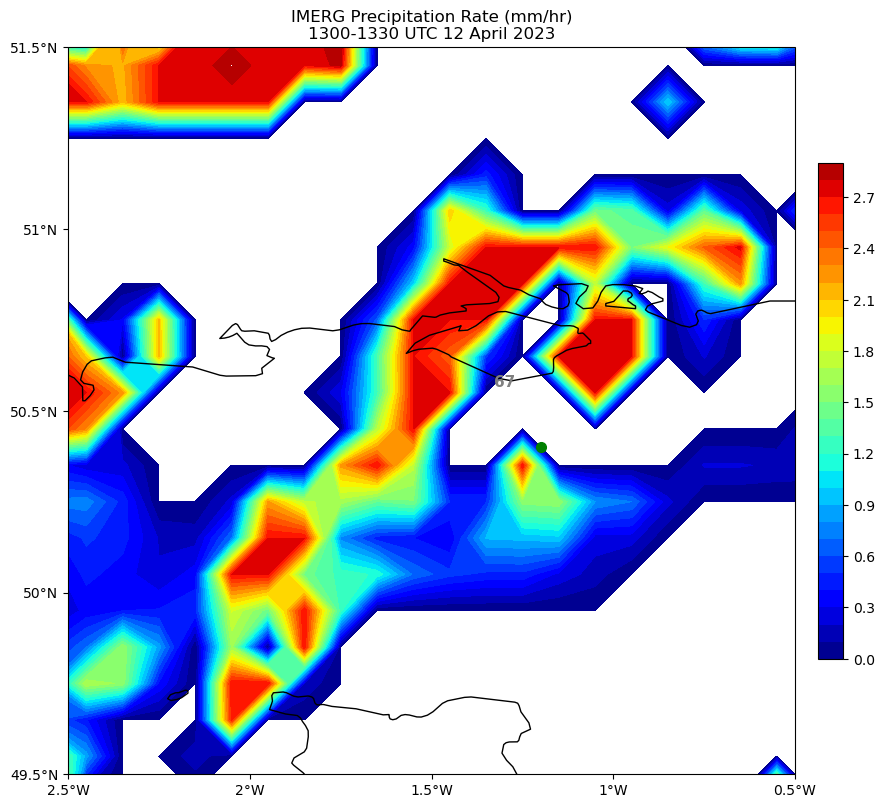

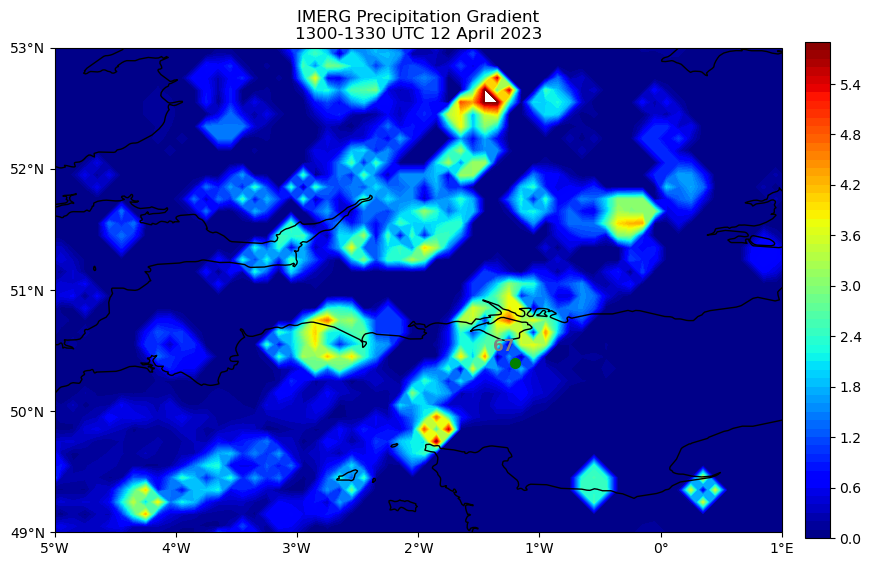

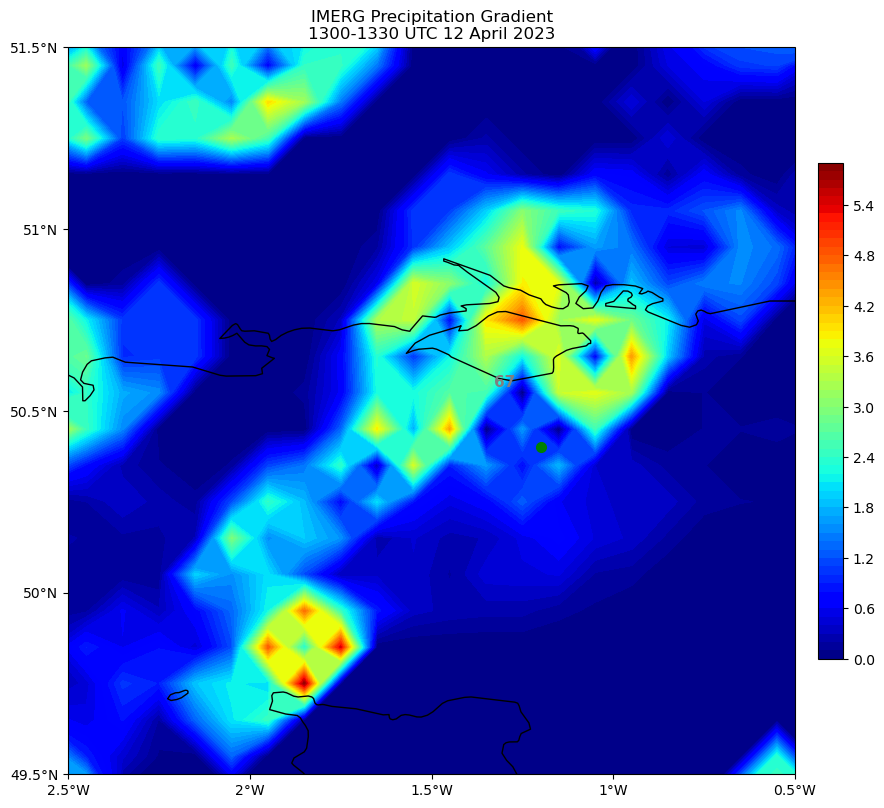

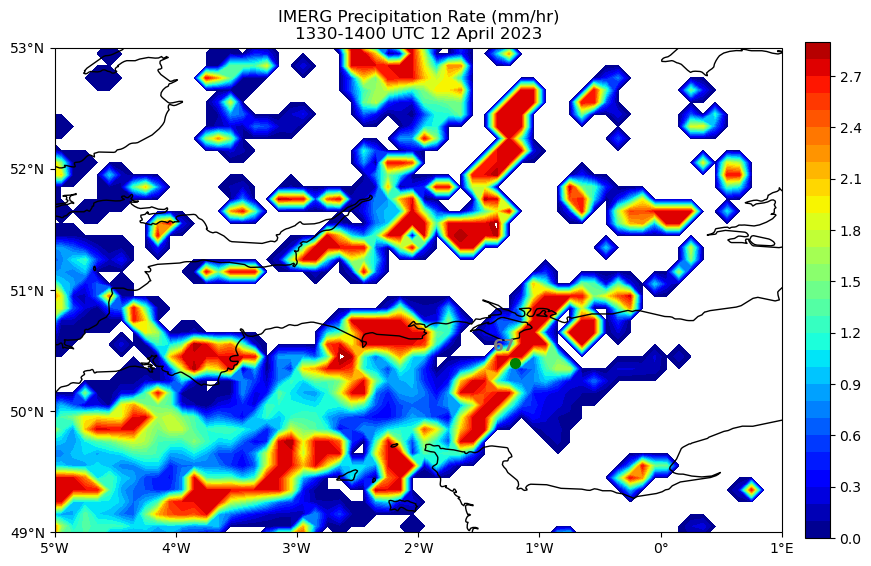

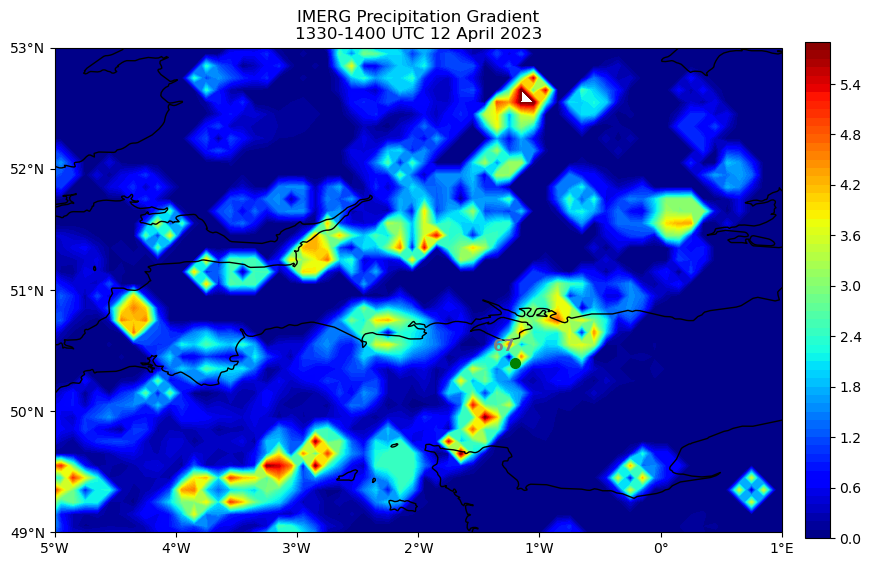

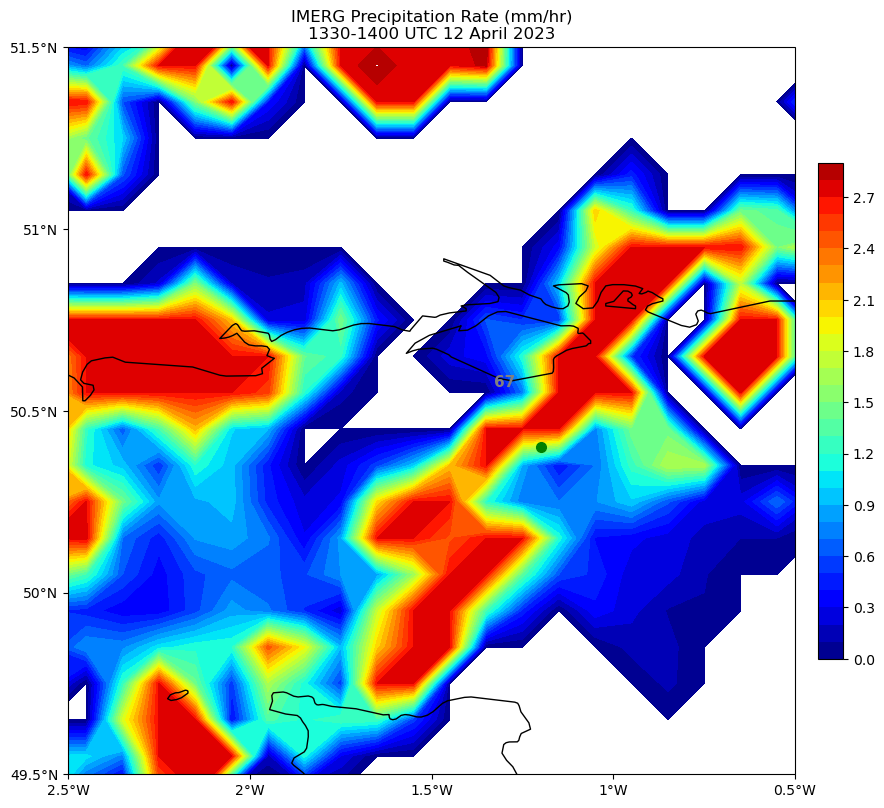

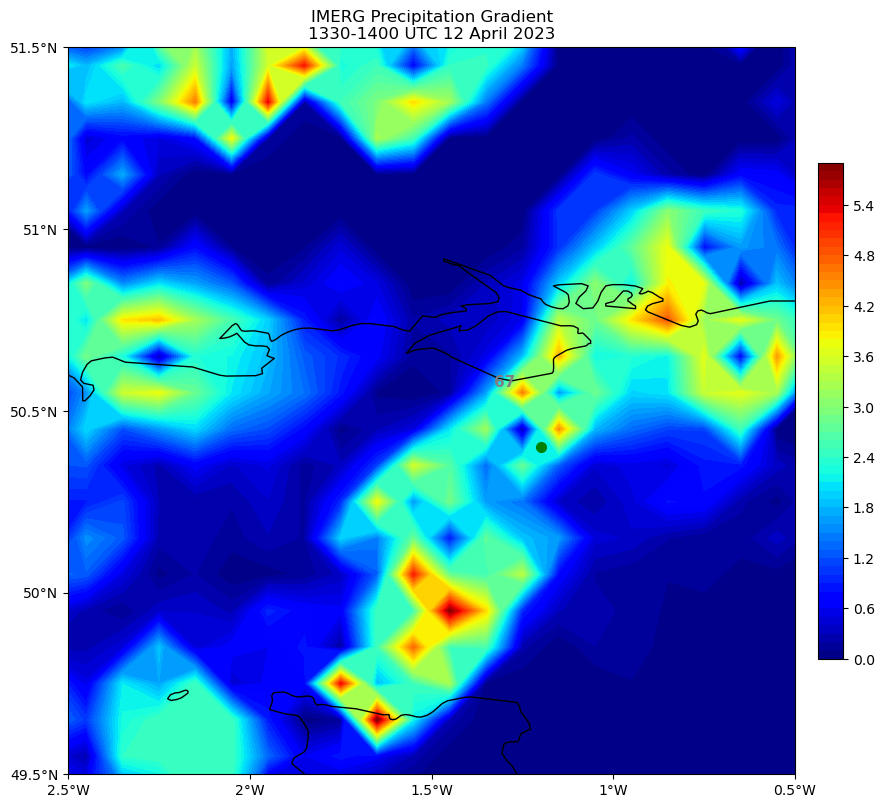

In [4]:
fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '1300-1330 UTC 12 April 2023')

Plevels = np.arange(0,3,0.1)
cbtd = ax.contourf(lon_imerg_1300,lat_imerg_1300,cal_precip_1300,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=3)

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-1.2, 50.4, 'og', markersize=7, transform=crs.Geodetic())
ax.text(-1.3, 50.6, '67', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_1300.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2.5, -0.5, 49.5, 51.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2.5, -0.5, 49.5, 51.5], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '1300-1330 UTC 12 April 2023')

Plevels = np.arange(0,3,0.1)
cbtd = ax.contourf(lon_imerg_1300,lat_imerg_1300,cal_precip_1300,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=3)

ax.set_xticks([-2.5,-2,-1.5,-1,-0.5])
ax.set_yticks([49.5,50,50.5,51,51.5])   

ax.plot(-1.2, 50.4, 'og', markersize=7, transform=crs.Geodetic())
ax.text(-1.3, 50.6, '67', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_1300_iow.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Gradient\n' 
          '1300-1330 UTC 12 April 2023')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_1300,lat_imerg_1300,mag_1300,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-1.2, 50.4, 'og', markersize=7, transform=crs.Geodetic())
ax.text(-1.3, 50.6, '67', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_1300.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2.5, -0.5, 49.5, 51.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2.5, -0.5, 49.5, 51.5], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Gradient\n' 
          '1300-1330 UTC 12 April 2023')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_1300,lat_imerg_1300,mag_1300,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-2.5,-2,-1.5,-1,-0.5])
ax.set_yticks([49.5,50,50.5,51,51.5])   

ax.plot(-1.2, 50.4, 'og', markersize=7, transform=crs.Geodetic())
ax.text(-1.3, 50.6, '67', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_1300_iow.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '1330-1400 UTC 12 April 2023')

Plevels = np.arange(0,3,0.1)
cbtd = ax.contourf(lon_imerg_1330,lat_imerg_1330,cal_precip_1330,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=3)

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-1.2, 50.4, 'og', markersize=7, transform=crs.Geodetic())
ax.text(-1.3, 50.6, '67', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_1330.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Gradient\n' 
          '1330-1400 UTC 12 April 2023')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_1330,lat_imerg_1330,mag_1330,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-1.2, 50.4, 'og', markersize=7, transform=crs.Geodetic())
ax.text(-1.3, 50.6, '67', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_1330.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2.5, -0.5, 49.5, 51.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2.5, -0.5, 49.5, 51.5], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '1330-1400 UTC 12 April 2023')

Plevels = np.arange(0,3,0.1)
cbtd = ax.contourf(lon_imerg_1330,lat_imerg_1330,cal_precip_1330,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=3)

ax.set_xticks([-2.5,-2,-1.5,-1,-0.5])
ax.set_yticks([49.5,50,50.5,51,51.5])   

ax.plot(-1.2, 50.4, 'og', markersize=7, transform=crs.Geodetic())
ax.text(-1.3, 50.6, '67', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_1330_iow.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-2.5, -0.5, 49.5, 51.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-2.5, -0.5, 49.5, 51.5], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Gradient\n' 
          '1330-1400 UTC 12 April 2023')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_1330,lat_imerg_1330,mag_1330,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-2.5,-2,-1.5,-1,-0.5])
ax.set_yticks([49.5,50,50.5,51,51.5])   

ax.plot(-1.2, 50.4, 'og', markersize=7, transform=crs.Geodetic())
ax.text(-1.3, 50.6, '67', color='gray', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_1330_iow.png",dpi=250,bbox_inches='tight')
plt.show()